### Housing Price - Prediction of house prices in California

In [2]:
import pandas as pd  #to handel any type of dataframe imported pandas

In [3]:
#Importing data from the CSV link given below
#data csv is now saved in dataframe called california

In [4]:
california_df= pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
#to show the basic information about the data
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
#to know interesting facts about data I will do describe()
california_df.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#checking top rows
california_df.head()
#similarly tail() for last rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

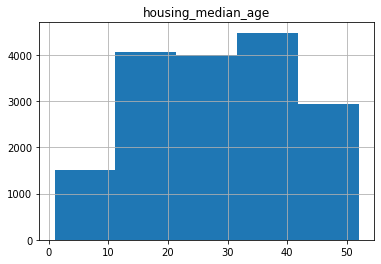

In [8]:
california_df.hist('housing_median_age', bins = 5) 
#Checking distribution of housing median age 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

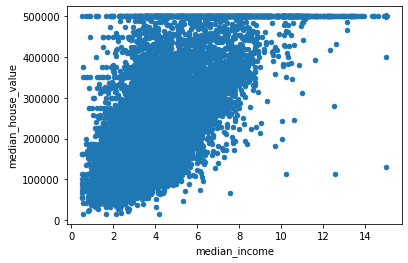

In [9]:
california_df.plot.scatter('median_income', 'median_house_value')  #strongly correlated
#checking the  relationship between 2 variables - it shows they are strongly related

## SKLEARN API  - DIFFERNT MODELS(Knn, decision tree, random forest)

### 1. KNeighborClasifier

In [37]:
#Just to try SKLEARN API once with KNeighborClasifier on my model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Preparing X,y
y_df = california_df[ 'median_house_value' ]  #taking target value
y_df  #taking only target feature
X_df= california_df.drop( 'median_house_value',axis=1 )
X_df #dropping off target taking all other


#spliting them now
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,test_size=0.2)


#putting it to model 
clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train, y_train)

clf.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.

#predicting on X test data
y_pred = clf.predict(X_test)


clf.score(X_test,y_pred )  #100 percent

1.0

In [19]:
len(y_pred) 

#california_df['Housing_pred'] = y_pred
#type(y_pred) 
#california_df = california_df[y_pred]

4250

### 2. Decision tree

In [20]:
from sklearn.tree import DecisionTreeRegressor  # code to create a decision tree for regression
from sklearn import tree                        # code to visualize a decision tree
import matplotlib.pyplot as plt                 # plotting library needed to draw the nodes and branches

In [23]:
regr = DecisionTreeRegressor(random_state=1234, max_depth=2)  # this creates a generic decision tree model (sort of like a recipe)
model = regr.fit(X_train, y_train)            # this trains our generic model on our specific data to create a decision tree for our data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7111,-118.32,33.98,46.0,1611.0,339.0,921.0,314.0,3.0833
15690,-122.39,40.58,44.0,1625.0,392.0,944.0,347.0,1.5972
1152,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531
14459,-122.13,37.46,35.0,1321.0,300.0,1133.0,287.0,3.7312
5344,-118.15,34.14,27.0,1499.0,426.0,755.0,414.0,3.8750
...,...,...,...,...,...,...,...,...
15543,-122.33,37.89,42.0,1342.0,291.0,551.0,266.0,4.5268
12160,-121.45,38.57,52.0,2006.0,412.0,825.0,384.0,3.2963
3283,-117.87,34.15,37.0,2655.0,415.0,1056.0,401.0,5.4224
12635,-121.73,36.86,28.0,827.0,178.0,703.0,144.0,4.4271


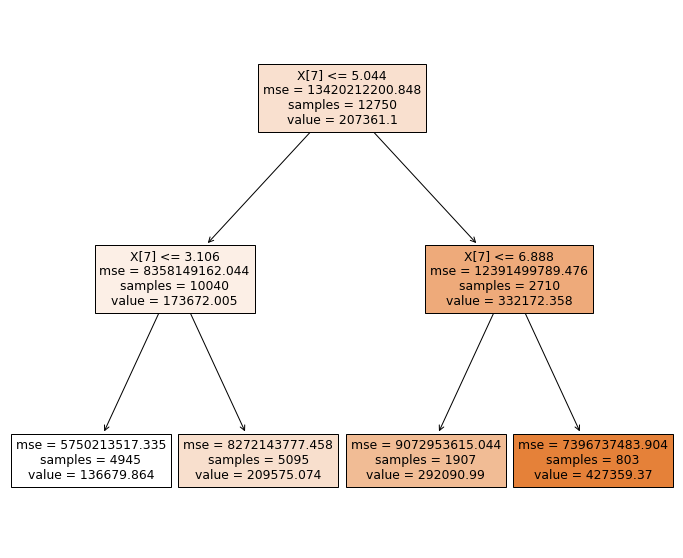

In [27]:
fig = plt.figure(figsize=(12,10))             # use this to adjust the size of the image
_ = tree.plot_tree(regr, filled=True) 

#I have stoped the decision tree length @2

### 3. Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#check documentation for more information:
rf = RandomForestRegressor(n_estimators=10)    #n_stimator is hyperparatmer

#training the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [39]:
#now I have taken the predicted values 
#I will use mean absolute error to determine how well my model does at predicting rent price for that I will check mean absolute error
predictions = rf.predict(X_train)

e = mean_absolute_error(y_train, predictions)

ep = e*100 / y_df.mean()

print(f"${e:.0f} average error; {ep:.2f}% error")

$19052 average error; 9.19% error


checking generality of the model, checking if the model is learning or cramming

In [41]:
#EVALUATING THE MODEL
predictions = rf.predict(X_test)

#MEAN ABSOLUTE ERROR CHECKS THE DIFFERENCE(target - prediction)

v_e = mean_absolute_error(y_test, predictions)

v_ep = e*100 / y_df.mean()

print(f"${e:.0f} average error; {ep:.2f}% error")

$19151 average error; 9.24% error


we can check the generanality of the model by checking the mae, accuracy on validation data set. Validation is the dataset which model has not seen.

In [ ]:
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'SalePrice', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)


<b>Tuning:</b> For tuning any model, we consider 2 things - 1 <b>Paramters</b> and 2nd is  <b>Hyper paramters </b>. Parameter are the one which model learns itself, whereas we define hyperparamters. 
    Example = Hyperparameter = n_estimator, whereas paramters example would be learning weights(model learns that in every backpropogation= y=w0+w1x1) 
    
To tune model means to try model for different hyperparamters so to maximizing a model's performance without overfitting or creating too high of a variance.
    

# FEATURE IMPORTANCES